In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Dataset/listings.csv/listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,NaN,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,...,4.91,5.00,4.55,Pending Application,f,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,NaN,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,...,4.99,4.76,4.87,STR-0007772,f,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,NaN,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,...,4.72,4.36,4.47,STR-0001599,f,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,NaN,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,...,4.92,4.85,4.60,NaN,f,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,NaN,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,...,5.00,4.50,4.50,NaN,f,1,1,0,0,0.02


In [4]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [5]:
data['price'].describe()

count     8056.000000
mean       392.071003
std       2182.756993
min         10.000000
25%         95.000000
50%        145.000000
75%        249.000000
max      50000.000000
Name: price, dtype: float64

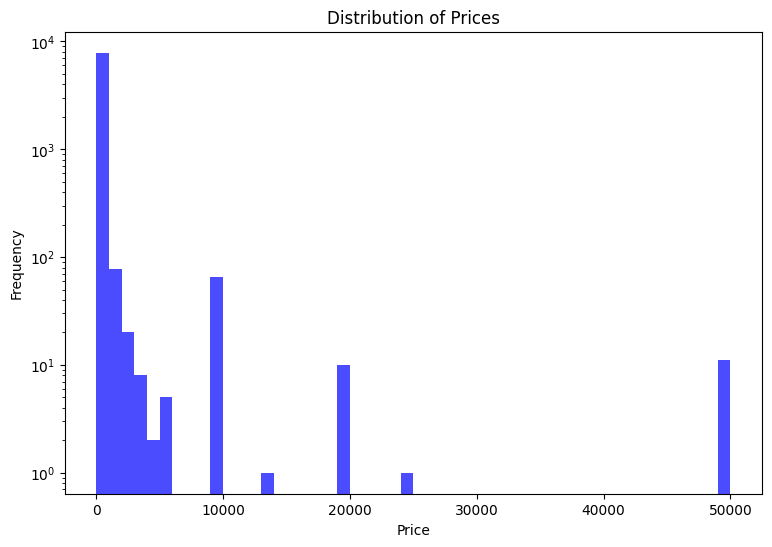

In [6]:
plt.figure(figsize=(9, 6))
plt.hist(data['price'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

to include only rows where the value in the "price" column is greater than 0.

In [7]:
data = data[(data["price"] > 0)]

<Axes: xlabel='price', ylabel='Count'>

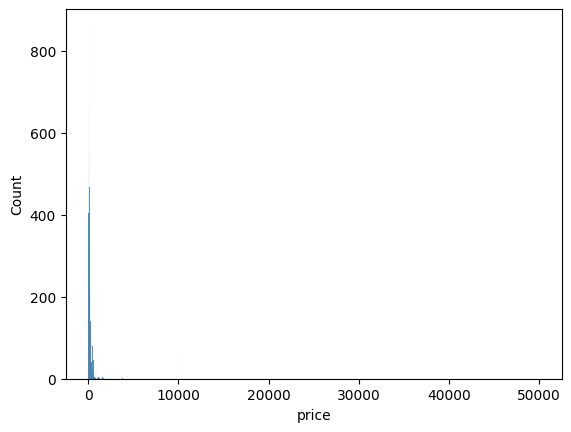

In [8]:
sns.histplot(data['price'])

Perfomed log trascation to nominalize right-skewed variable

In [9]:
data['log_price'] = np.log(data['price'])

<Axes: xlabel='log_price', ylabel='Count'>

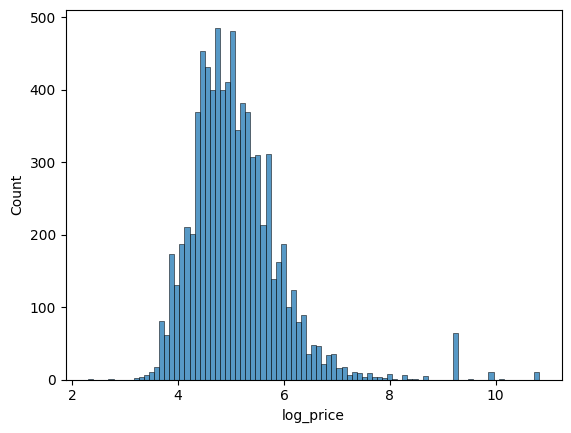

In [10]:
sns.histplot(data['log_price'])

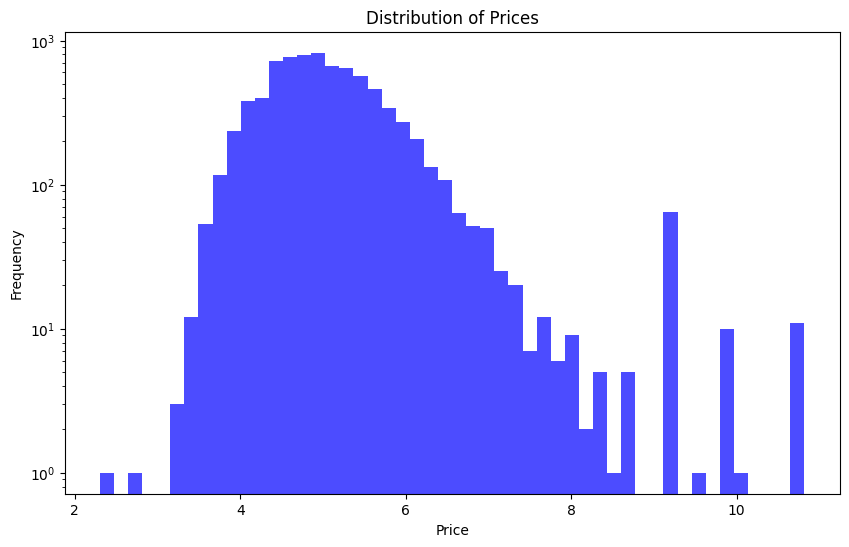

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['log_price'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [12]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [13]:
data['property_type'].value_counts().head(20)

property_type
Entire rental unit                   2073
Entire home                          1024
Private room in home                  964
Entire condo                          934
Room in hotel                         722
Private room in rental unit           575
Entire guest suite                    512
Room in boutique hotel                283
Private room in condo                 190
Entire serviced apartment             159
Entire guesthouse                      74
Room in aparthotel                     65
Entire townhouse                       65
Entire loft                            63
Private room in guest suite            52
Private room in townhouse              45
Shared room in hostel                  39
Private room in hostel                 31
Private room in resort                 29
Private room in bed and breakfast      20
Name: count, dtype: int64

In [14]:
def classify_property_type(value):
    value_lower = value.lower()
    if 'rental unit' in value_lower:
        return 'rental unit'
    elif 'condo' in value_lower:
        return 'condo'
    elif 'guesthouse' in value_lower:
        return 'guesthouse'
    elif 'guest suite' in value_lower:
        return 'guest suite'
    elif 'home' in value_lower:
        return 'home'
    elif 'hotel' in value_lower:
        return 'hotel'
    elif 'bungalow' in value_lower:
        return 'bungalow'
    elif 'villa' in value_lower:
        return 'villa'
    elif 'townhouse' in value_lower:
        return 'townhouse'
    elif 'loft' in value_lower:
        return 'loft'
    elif 'serviced apartment' in value_lower:
        return 'serviced apartment'
    else:
        return 'other'
data['property'] = data['property_type'].apply(classify_property_type)

In [15]:
data['property'].value_counts()

property
rental unit           2655
home                  2021
condo                 1124
hotel                 1072
guest suite            564
serviced apartment     174
other                  168
townhouse              110
guesthouse              81
loft                    70
villa                   12
bungalow                 5
Name: count, dtype: int64

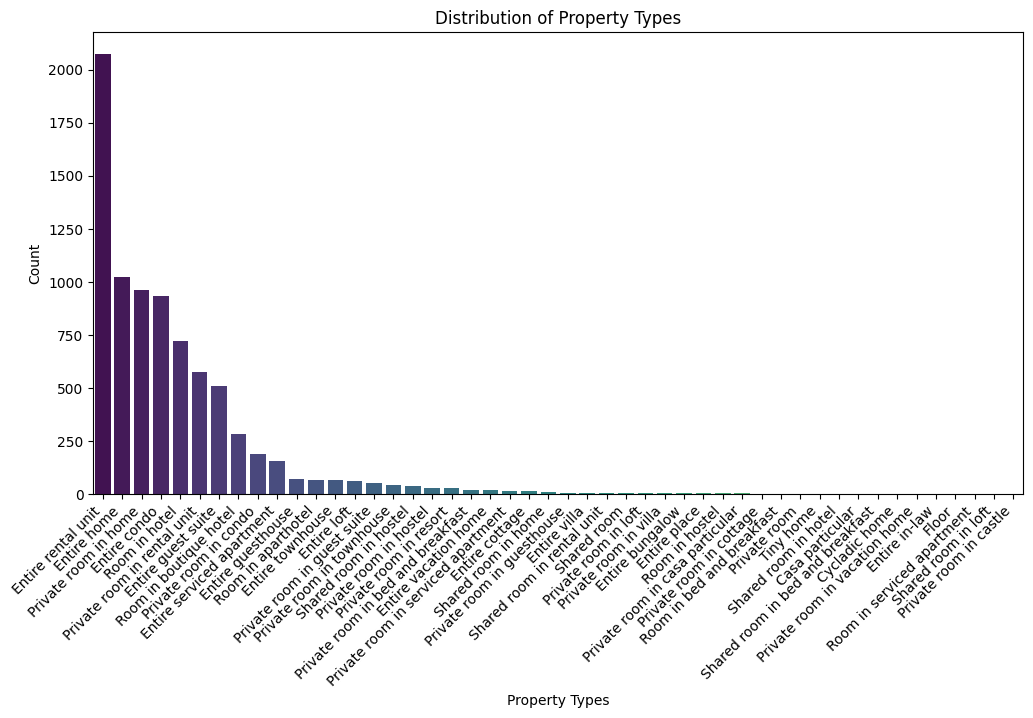

In [16]:
property_type = data['property_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=property_type.index, y=property_type.values, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Discrete property_type

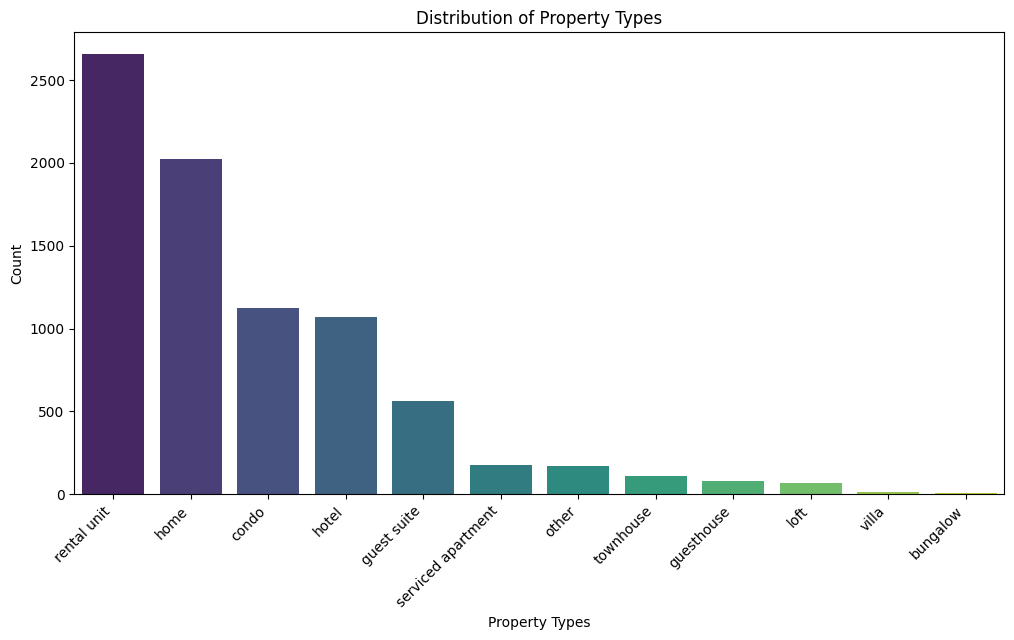

In [17]:
property_counts = data['property'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
data['bedrooms'].fillna(data['beds'], inplace=True)

Extract the number from bathrooms_text

In [19]:
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+\.\d+|\d+)')
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

In [20]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [21]:
data['bedrooms'].head()

0    4.0
1    2.0
2    4.0
3    1.0
4    2.0
Name: bedrooms, dtype: float64

In [22]:
data[['bedrooms','bathrooms','room_type','instant_bookable','accommodates','neighbourhood_group_cleansed','host_identity_verified','number_of_reviews','log_price']].isna().sum()

bedrooms                          97
bathrooms                         33
room_type                          0
instant_bookable                   0
accommodates                       0
neighbourhood_group_cleansed    8056
host_identity_verified             1
number_of_reviews                  0
log_price                          0
dtype: int64

In [23]:
df = data[['property','bathrooms','bedrooms','accommodates','instant_bookable','room_type','neighbourhood_group_cleansed','host_identity_verified','number_of_reviews','log_price','reviews_per_month','review_scores_accuracy','review_scores_cleanliness','availability_30','availability_60','availability_90','availability_365', 'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count','host_total_listings_count','host_acceptance_rate','host_response_rate']]

In [24]:
df.head()

,property,bathrooms,bedrooms,accommodates,instant_bookable,room_type,neighbourhood_group_cleansed,host_identity_verified,number_of_reviews,log_price,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,host_listings_count,host_total_listings_count,host_acceptance_rate,host_response_rate
0,home,2.0,4.0,8,f,Entire home/apt,NaN,t,34,7.130899,...,5,7,1125,1125,5.1,1125.0,1.0,5.0,100%,100%
1,home,1.0,2.0,4,f,Private room,NaN,t,149,4.369448,...,2,2,1125,1125,2.0,1125.0,1.0,3.0,100%,100%
2,rental unit,2.0,4.0,4,f,Entire home/apt,NaN,t,36,5.517453,...,5,6,29,29,5.1,29.0,1.0,1.0,60%,100%
3,rental unit,1.0,1.0,2,f,Entire home/apt,NaN,t,196,4.828314,...,30,30,200,200,30.0,200.0,2.0,2.0,86%,100%
4,condo,1.0,2.0,2,f,Entire home/apt,NaN,t,2,4.248495,...,30,30,1125,1125,30.0,1125.0,1.0,1.0,NaN,NaN


Check if there is any NA values

In [25]:
data[['property','bathrooms','bedrooms','accommodates','instant_bookable','room_type','host_identity_verified','number_of_reviews','log_price','reviews_per_month','review_scores_accuracy','review_scores_cleanliness','availability_30','availability_60','availability_90','availability_365', 'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count','host_total_listings_count','host_acceptance_rate','host_response_rate']].isna().sum()

property                        0
bathrooms                      33
bedrooms                       97
accommodates                    0
instant_bookable                0
room_type                       0
host_identity_verified          1
number_of_reviews               0
log_price                       0
reviews_per_month            1884
review_scores_accuracy       1883
review_scores_cleanliness    1883
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
minimum_nights                  0
maximum_nights                  0
minimum_minimum_nights          0
maximum_minimum_nights          0
minimum_maximum_nights          0
maximum_maximum_nights          0
minimum_nights_avg_ntm          0
maximum_nights_avg_ntm          0
host_listings_count             1
host_total_listings_count       1
host_acceptance_rate          886
host_response_rate           1309
dtype: int64

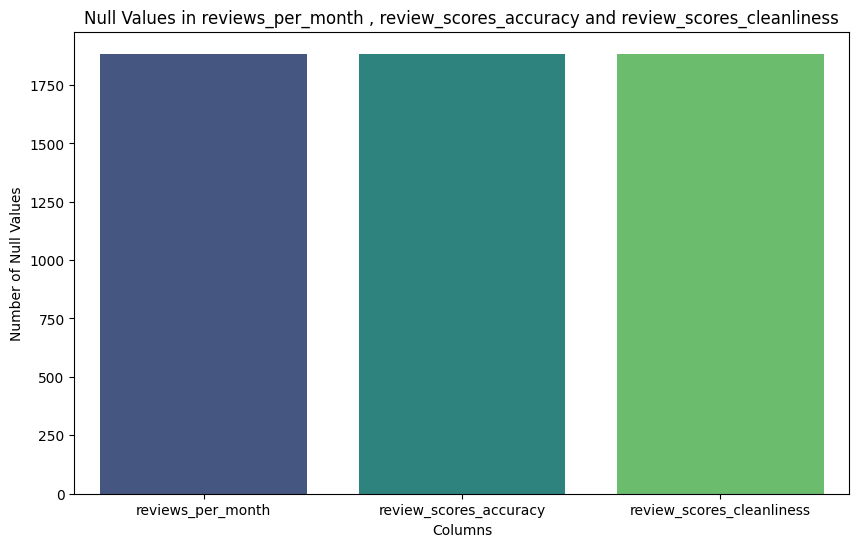

In [26]:
null_values = data[['reviews_per_month', 'review_scores_accuracy','review_scores_cleanliness']].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')
plt.title('Null Values in reviews_per_month , review_scores_accuracy and review_scores_cleanliness')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [27]:
median_reviews_per_month = data['reviews_per_month'].median()
data['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

In [28]:
median_accuracy = data['review_scores_accuracy'].median()
data['review_scores_accuracy'].fillna(median_accuracy, inplace=True)

In [29]:
median_cleanliness = data['review_scores_cleanliness'].median()
data['review_scores_cleanliness'].fillna(median_cleanliness, inplace=True)

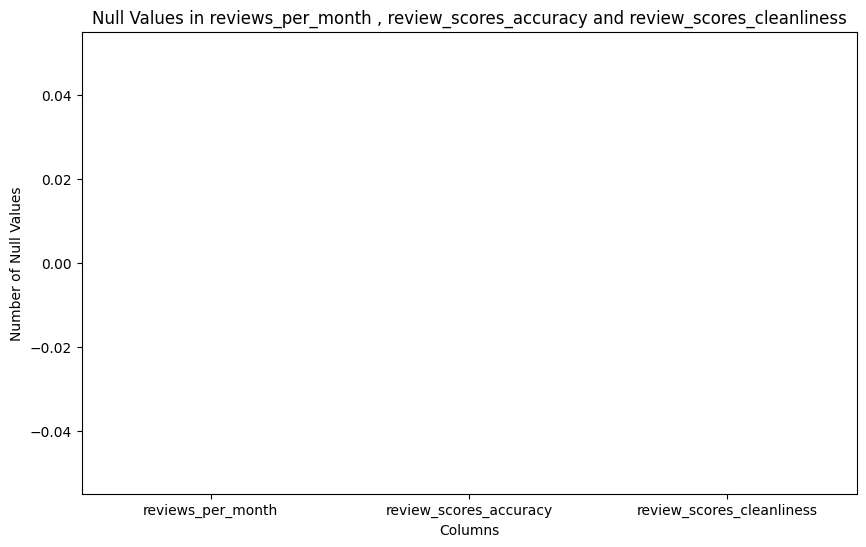

In [30]:
null_values = data[['reviews_per_month', 'review_scores_accuracy','review_scores_cleanliness']].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')
plt.title('Null Values in reviews_per_month , review_scores_accuracy and review_scores_cleanliness')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [31]:
data[['property','bathrooms','bedrooms','accommodates','instant_bookable','room_type','host_identity_verified','number_of_reviews','log_price','reviews_per_month','review_scores_accuracy','review_scores_cleanliness','availability_30','availability_60','availability_90','availability_365', 'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count','host_total_listings_count','host_acceptance_rate','host_response_rate']].isna().sum()

property                        0
bathrooms                      33
bedrooms                       97
accommodates                    0
instant_bookable                0
room_type                       0
host_identity_verified          1
number_of_reviews               0
log_price                       0
reviews_per_month               0
review_scores_accuracy          0
review_scores_cleanliness       0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
minimum_nights                  0
maximum_nights                  0
minimum_minimum_nights          0
maximum_minimum_nights          0
minimum_maximum_nights          0
maximum_maximum_nights          0
minimum_nights_avg_ntm          0
maximum_nights_avg_ntm          0
host_listings_count             1
host_total_listings_count       1
host_acceptance_rate          886
host_response_rate           1309
dtype: int64

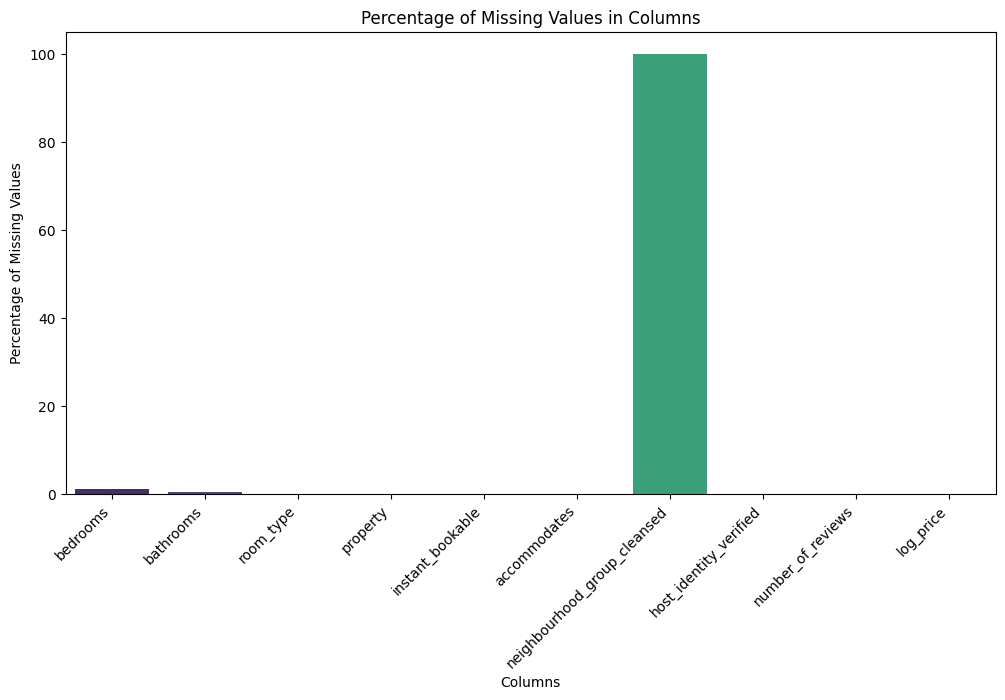

In [32]:
columns_of_interest = ['bedrooms', 'bathrooms', 'room_type', 'property', 'instant_bookable',
                         'accommodates', 'neighbourhood_group_cleansed', 'host_identity_verified',
                         'number_of_reviews', 'log_price']

selected_data = data[columns_of_interest]

missing_percentage = (selected_data.isnull().sum() / len(selected_data)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.title('Percentage of Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

#### We can drop the "neighbourhood_group_cleansed" as it is empty

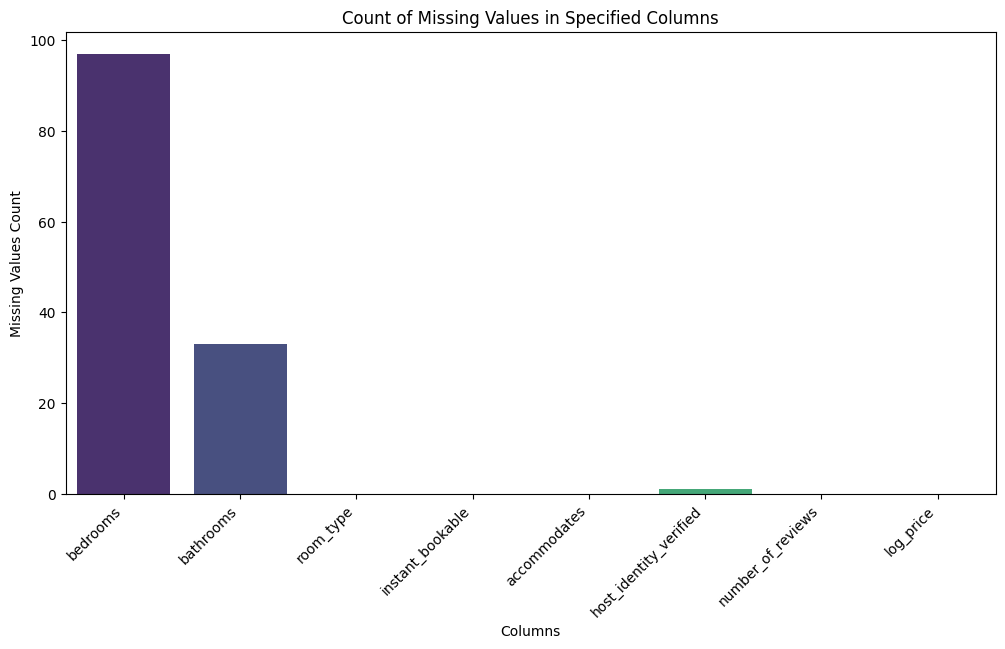

In [33]:
columns_subset = ['bedrooms', 'bathrooms', 'room_type', 'instant_bookable', 'accommodates',
                  'host_identity_verified', 'number_of_reviews', 'log_price']
missing_values = data[columns_subset].isna().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Count of Missing Values in Specified Columns')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
mean_bedrooms = data['bedrooms'].mean()
data['bedrooms'].fillna(mean_bedrooms, inplace=True)

In [35]:
data['bedrooms'].isna().sum()

0

In [36]:
mean_bathrooms = data['bathrooms'].mean()
data['bathrooms'].fillna(mean_bathrooms, inplace=True)

In [37]:
data['bathrooms'].isna().sum()

0

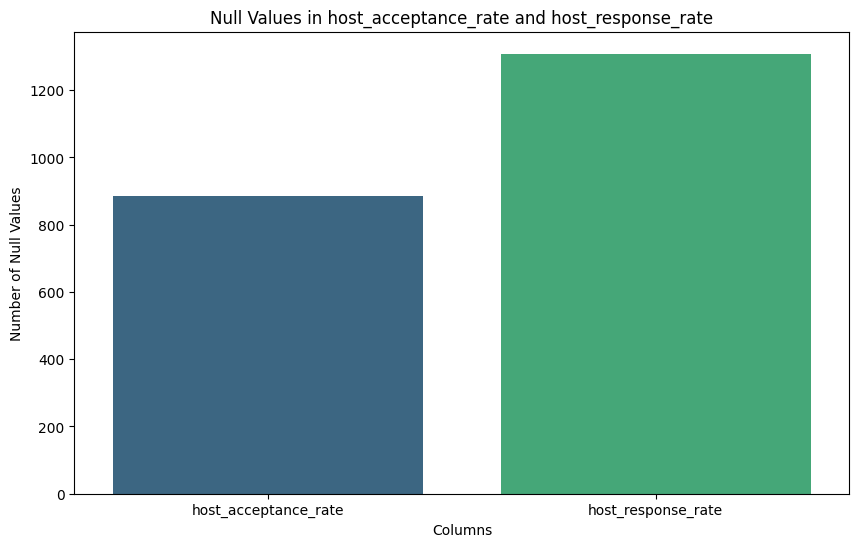

In [38]:
null_values = data[['host_acceptance_rate', 'host_response_rate']].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')
plt.title('Null Values in host_acceptance_rate and host_response_rate')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [39]:
data['host_response_rate'].isnull().sum()

1309

In [40]:
data['host_response_rate'] = pd.to_numeric(data['host_response_rate'].str.rstrip('%'), errors='coerce')

In [41]:
data['host_response_rate'].head()

0    100.0
1    100.0
2    100.0
3    100.0
4      NaN
Name: host_response_rate, dtype: float64

In [42]:
median_response_rate = data['host_response_rate'].median()
data['host_response_rate'].fillna(median_response_rate, inplace=True)

In [43]:
data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'].str.rstrip('%'), errors='coerce')

In [44]:
data['host_acceptance_rate'].head()

0    100.0
1    100.0
2     60.0
3     86.0
4      NaN
Name: host_acceptance_rate, dtype: float64

In [45]:
data['host_acceptance_rate'].isnull().sum()

886

In [46]:
median_response_rate = data['host_acceptance_rate'].median()
data['host_acceptance_rate'].fillna(median_response_rate, inplace=True)

In [47]:
data['host_acceptance_rate'].isnull().sum()

0

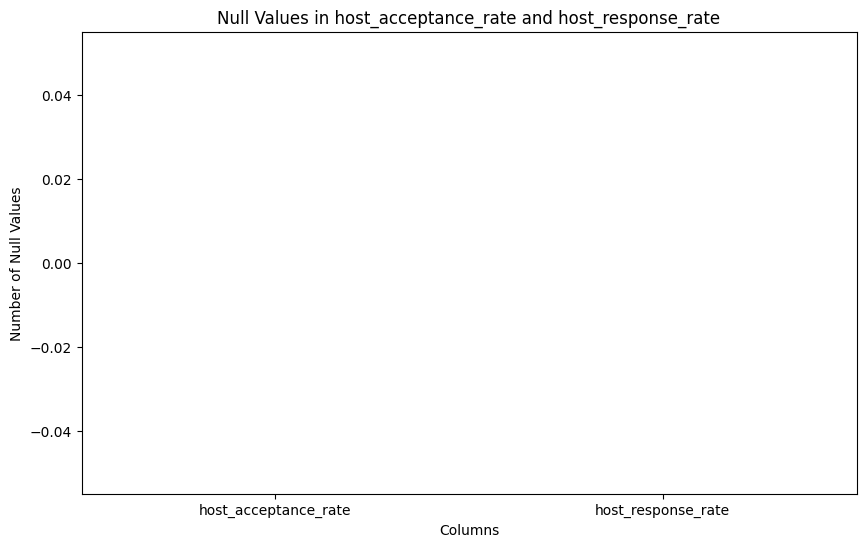

In [48]:
null_values = data[['host_acceptance_rate', 'host_response_rate']].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')
plt.title('Null Values in host_acceptance_rate and host_response_rate')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

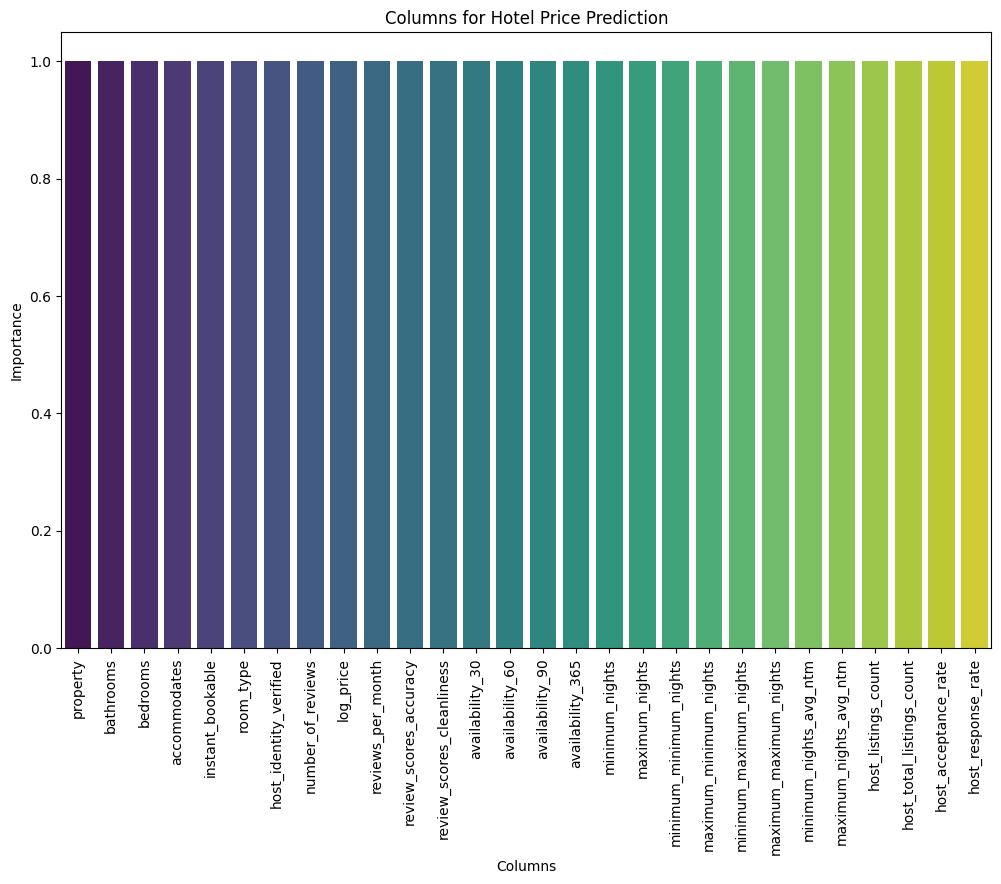

In [49]:
columns = ['property', 'bathrooms', 'bedrooms', 'accommodates', 'instant_bookable', 'room_type', 'host_identity_verified',
           'number_of_reviews', 'log_price', 'reviews_per_month', 'review_scores_accuracy', 'review_scores_cleanliness',
           'availability_30', 'availability_60', 'availability_90', 'availability_365', 'minimum_nights', 'maximum_nights',
           'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
           'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_listings_count', 'host_total_listings_count',
           'host_acceptance_rate', 'host_response_rate','room_type','instant_bookable','property','host_identity_verified']

plt.figure(figsize=(12, 8))
sns.barplot(x=columns, y=[1]*len(columns), palette='viridis')
plt.title('Columns for Hotel Price Prediction')
plt.xlabel('Columns')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [50]:
df = data[['property','bathrooms','bedrooms','accommodates','instant_bookable','room_type','host_identity_verified','number_of_reviews','log_price','reviews_per_month','review_scores_accuracy','review_scores_cleanliness','availability_30','availability_60','availability_90','availability_365', 'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count','host_total_listings_count','host_acceptance_rate','host_response_rate']]

Encode categorical variables

In [51]:
df = pd.get_dummies(df,columns=['room_type','instant_bookable','property','host_identity_verified'],drop_first=True, dtype=int)

In [52]:
df

,bathrooms,bedrooms,accommodates,number_of_reviews,log_price,reviews_per_month,review_scores_accuracy,review_scores_cleanliness,availability_30,availability_60,...,property_guesthouse,property_home,property_hotel,property_loft,property_other,property_rental unit,property_serviced apartment,property_townhouse,property_villa,host_identity_verified_t
0,2.0,4.0,8,34,7.130899,0.23,4.97,5.00,17,17,...,0,1,0,0,0,0,0,0,0,1
1,1.0,2.0,4,149,4.369448,1.92,4.93,4.93,16,45,...,0,1,0,0,0,0,0,0,0,1
2,2.0,4.0,4,36,5.517453,0.26,4.53,4.33,16,20,...,0,0,0,0,0,1,0,0,0,1
3,1.0,1.0,2,196,4.828314,1.41,4.85,4.84,30,60,...,0,0,0,0,0,1,0,0,0,1
4,1.0,2.0,2,2,4.248495,0.02,5.00,4.50,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,1.0,2.0,4,0,4.905275,0.56,4.93,4.91,23,53,...,0,0,0,0,0,1,0,0,0,0
8052,2.5,5.0,5,0,5.361292,0.56,4.93,4.91,30,60,...,0,1,0,0,0,0,0,0,0,1
8053,1.0,2.0,4,0,4.820282,0.56,4.93,4.91,0,5,...,0,0,0,0,0,1,0,0,0,1
8054,1.0,2.0,4,0,4.820282,0.56,4.93,4.91,0,5,...,0,0,0,0,0,1,0,0,0,1


In [53]:
df = df.dropna()

In [54]:
df

,bathrooms,bedrooms,accommodates,number_of_reviews,log_price,reviews_per_month,review_scores_accuracy,review_scores_cleanliness,availability_30,availability_60,...,property_guesthouse,property_home,property_hotel,property_loft,property_other,property_rental unit,property_serviced apartment,property_townhouse,property_villa,host_identity_verified_t
0,2.0,4.0,8,34,7.130899,0.23,4.97,5.00,17,17,...,0,1,0,0,0,0,0,0,0,1
1,1.0,2.0,4,149,4.369448,1.92,4.93,4.93,16,45,...,0,1,0,0,0,0,0,0,0,1
2,2.0,4.0,4,36,5.517453,0.26,4.53,4.33,16,20,...,0,0,0,0,0,1,0,0,0,1
3,1.0,1.0,2,196,4.828314,1.41,4.85,4.84,30,60,...,0,0,0,0,0,1,0,0,0,1
4,1.0,2.0,2,2,4.248495,0.02,5.00,4.50,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,1.0,2.0,4,0,4.905275,0.56,4.93,4.91,23,53,...,0,0,0,0,0,1,0,0,0,0
8052,2.5,5.0,5,0,5.361292,0.56,4.93,4.91,30,60,...,0,1,0,0,0,0,0,0,0,1
8053,1.0,2.0,4,0,4.820282,0.56,4.93,4.91,0,5,...,0,0,0,0,0,1,0,0,0,1
8054,1.0,2.0,4,0,4.820282,0.56,4.93,4.91,0,5,...,0,0,0,0,0,1,0,0,0,1


### Feature Selection

Create correlation map to find out if there is multicollinearity between features and the relationship between feature and outcome.

In [55]:
df.corr()

,bathrooms,bedrooms,accommodates,number_of_reviews,log_price,reviews_per_month,review_scores_accuracy,review_scores_cleanliness,availability_30,availability_60,...,property_guesthouse,property_home,property_hotel,property_loft,property_other,property_rental unit,property_serviced apartment,property_townhouse,property_villa,host_identity_verified_t
bathrooms,1.000000,0.441051,0.412091,-0.061944,0.201412,-0.048455,0.007872,-0.003903,-0.021941,-0.032444,...,-0.029173,0.233725,-0.123879,0.021242,0.121012,-0.112844,-0.016981,0.058443,0.069559,0.036203
bedrooms,0.441051,1.000000,0.859796,-0.017999,0.426290,0.012279,0.047066,0.057157,-0.066952,-0.070571,...,-0.016779,0.198253,-0.156702,-0.006682,-0.018372,-0.075603,-0.049719,0.052596,0.073996,-0.002665
accommodates,0.412091,0.859796,1.000000,-0.027984,0.519068,0.027460,0.061879,0.087198,-0.066334,-0.067899,...,-0.008936,0.165884,-0.108313,-0.006755,-0.052804,-0.093837,-0.028082,0.050704,0.081288,-0.001976
number_of_reviews,-0.061944,-0.017999,-0.027984,1.000000,-0.082332,0.692080,0.052938,0.050992,-0.114110,-0.074212,...,0.015342,0.066191,-0.088586,0.005224,0.030670,-0.103214,-0.041399,0.004527,-0.013209,0.017119
log_price,0.201412,0.426290,0.519068,-0.082332,1.000000,-0.074879,0.069755,0.133195,-0.069693,-0.078491,...,-0.017070,-0.022129,0.065986,0.018820,-0.042807,-0.103437,0.037091,0.023058,0.060177,0.032366
reviews_per_month,-0.048455,0.012279,0.027460,0.692080,-0.074879,1.000000,0.059354,0.081044,-0.119176,-0.076335,...,0.044506,0.105856,-0.051189,-0.021462,0.018409,-0.140952,-0.036292,0.001068,-0.007934,0.009149
review_scores_accuracy,0.007872,0.047066,0.061879,0.052938,0.069755,0.059354,1.000000,0.745334,-0.092552,-0.088965,...,0.021796,0.047957,-0.117899,-0.003983,-0.017245,-0.038728,0.004986,0.020588,0.004772,0.002418
review_scores_cleanliness,-0.003903,0.057157,0.087198,0.050992,0.133195,0.081044,0.745334,1.000000,-0.086787,-0.081240,...,0.021863,0.029901,-0.064800,-0.006778,-0.042945,-0.070181,0.021230,0.014253,0.008415,0.001754
availability_30,-0.021941,-0.066952,-0.066334,-0.114110,-0.069693,-0.119176,-0.092552,-0.086787,1.000000,0.929864,...,-0.012001,-0.041796,0.219771,-0.001836,-0.055275,-0.005793,-0.061949,-0.002197,-0.003618,0.039874
availability_60,-0.032444,-0.070571,-0.067899,-0.074212,-0.078491,-0.076335,-0.088965,-0.081240,0.929864,1.000000,...,-0.008429,-0.024564,0.196004,-0.006627,-0.061394,-0.007222,-0.064253,-0.013969,0.001012,0.048739


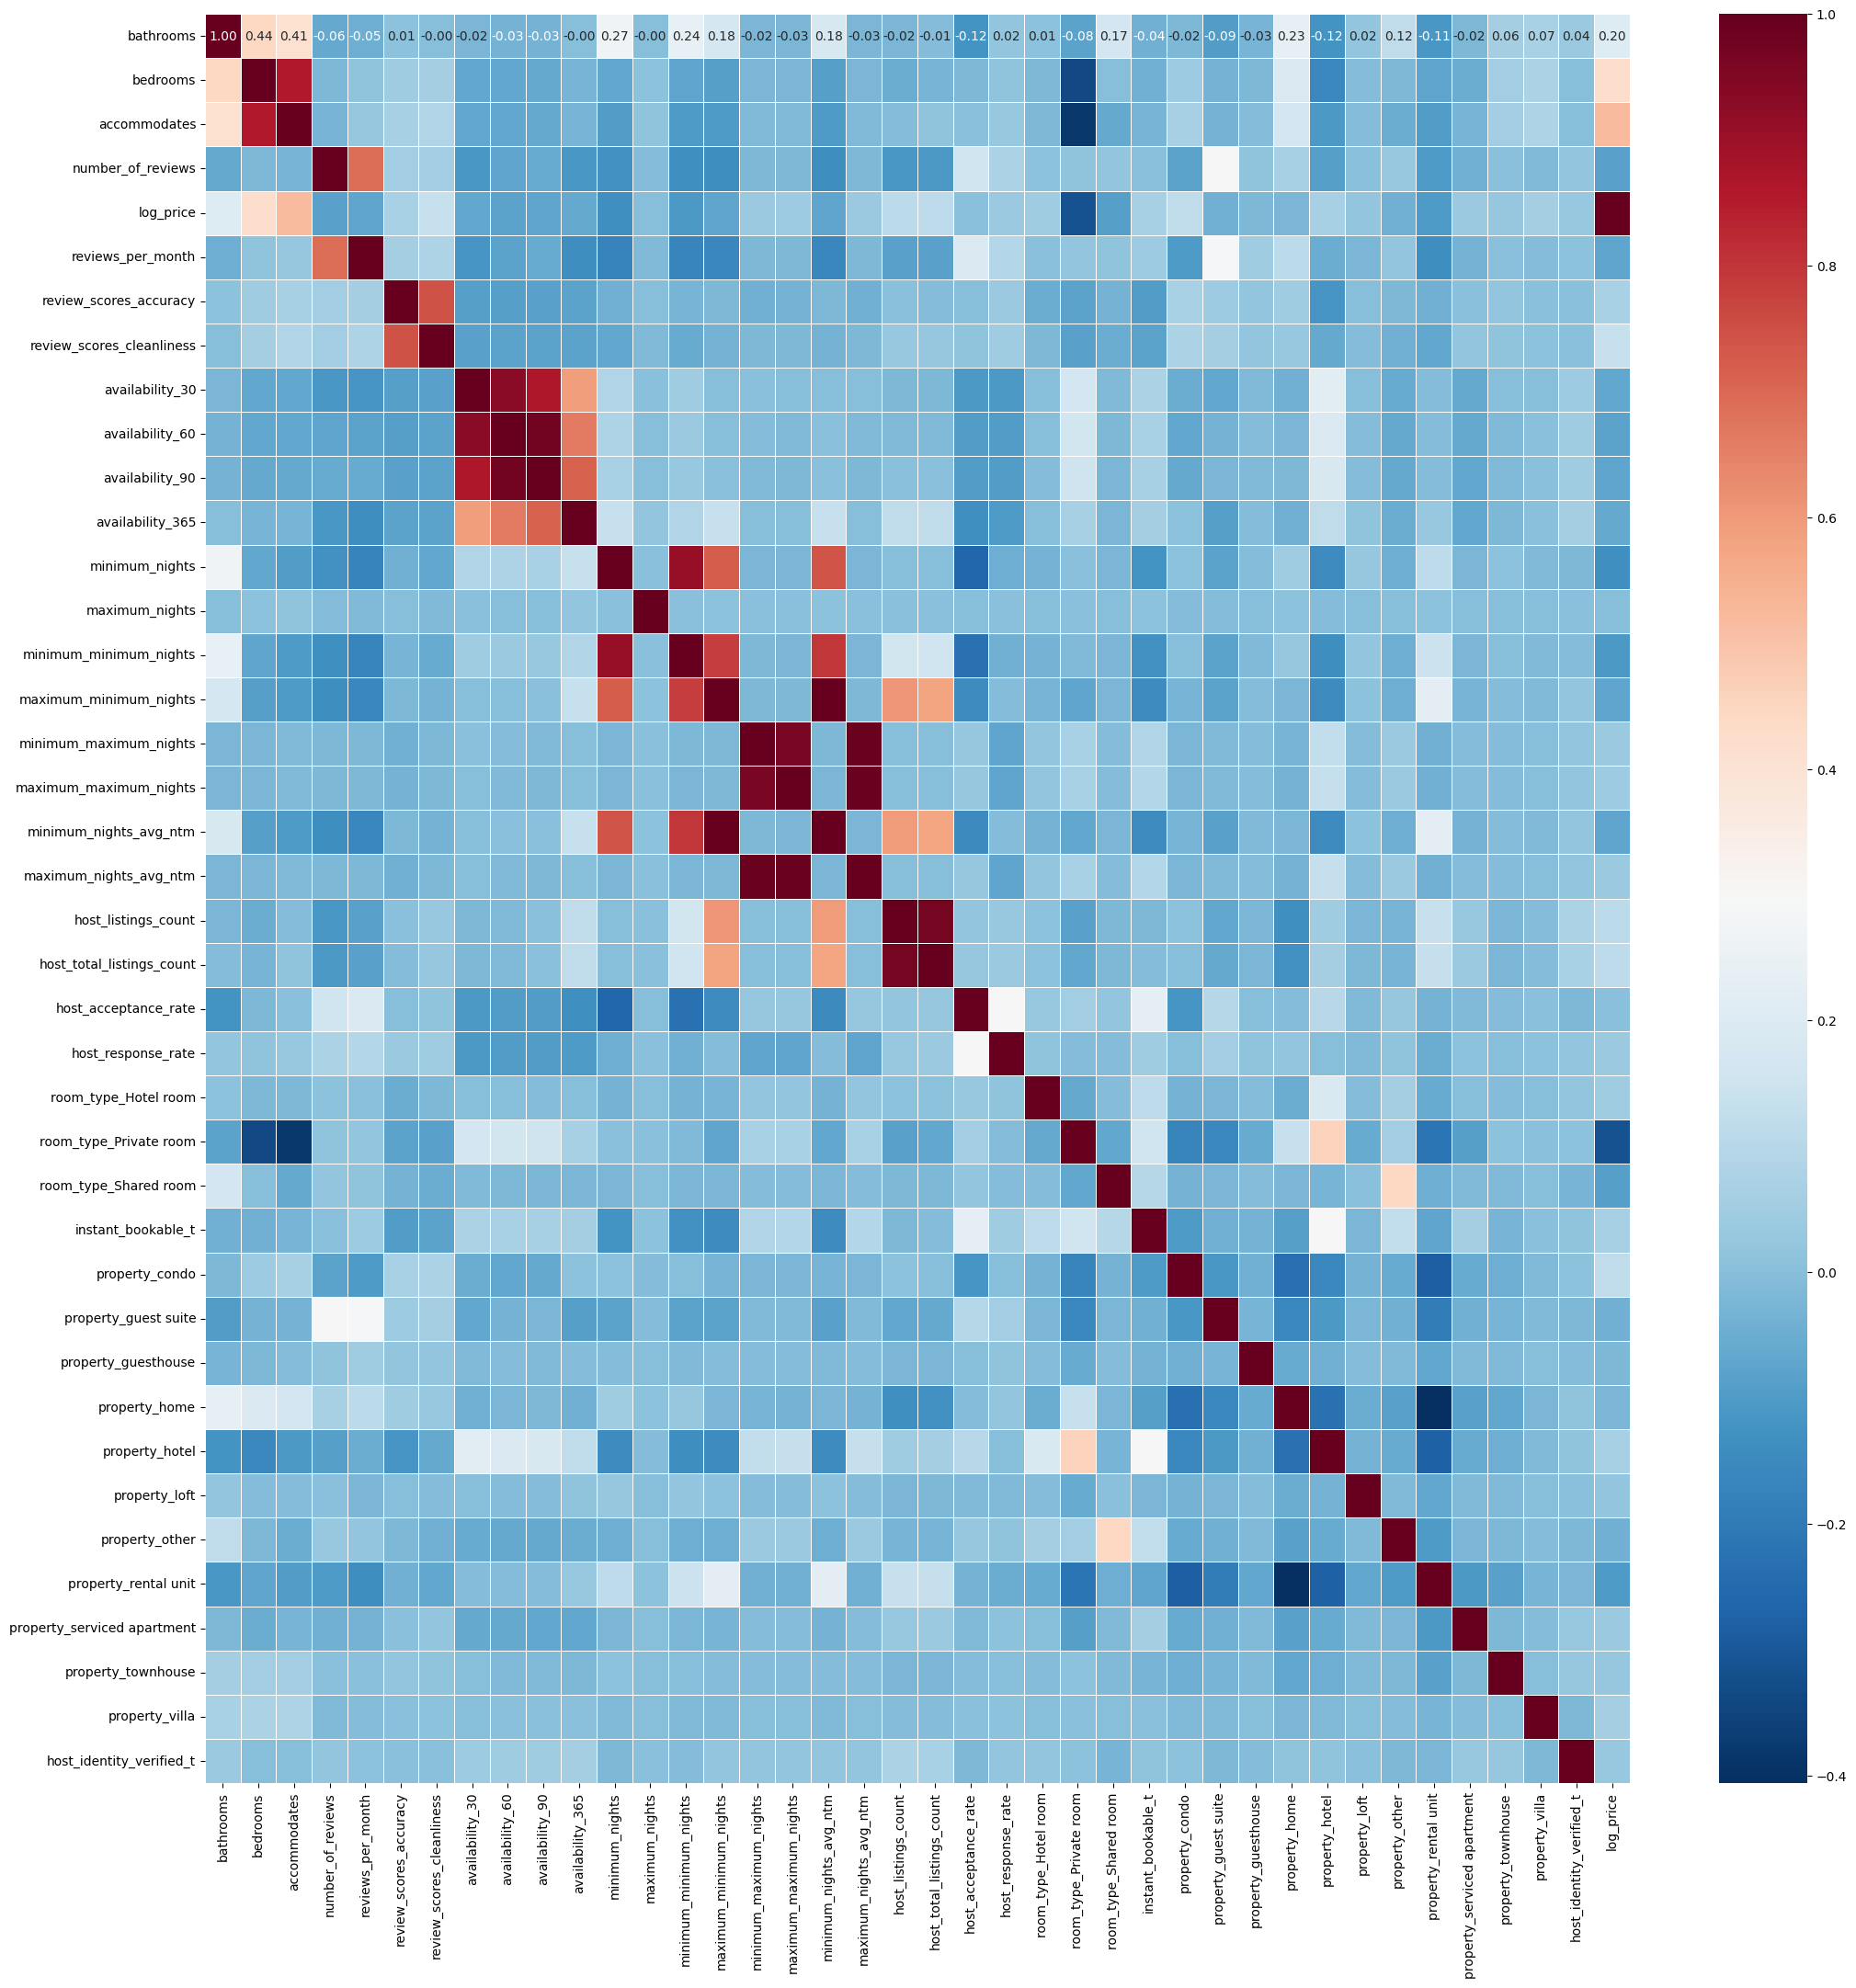

In [56]:
correlation_matrix = df.corr()
y_column_name = 'log_price'
correlation_matrix = correlation_matrix[[col for col in correlation_matrix.columns if col != y_column_name] + [y_column_name]]
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5)
plt.show()

### Positive Correlations:
- **bedrooms** and **accommodates** have a strong positive correlation of approximately 0.86. This suggests that as the number of bedrooms increases, the capacity to accommodate more people also tends to increase.
  
- **host_listings_count** and **host_total_listings_count** have a strong positive correlation of approximately 0.97. This is expected since these two features likely represent similar information.


### Negative Correlations:

- **log_price** and **room_type_Private** room have a negative correlation of approximately -0.31. This indicates that the price tends to be lower for private rooms compared to other room types.
  
- **availability_30**, **availability_60**, and **availability_90** have negative correlations with various property types, indicating that certain property types may have more consistent availability in the short term.


### Correlations with Target (log_price):

- **accommodates**, **bedrooms**, and **bathrooms** have positive correlations with **log_price**, suggesting that larger and more equipped properties tend to have higher prices.
  
- **room_type_Private** room has a negative correlation with **log_price**, indicating that private rooms tend to have lower prices compared to other room types.


### Property Type Correlations:

- There are correlations among different property types. For example, **property_home** and **property_rental** unit have a negative correlation of approximately -0.41, suggesting that these property types are less likely to co-occur.


### Reviews and Ratings:

- number_of_reviews has a negative correlation with **availability_30**, **availability_60**, and **availability_90**. This could mean that properties with more reviews tend to have higher occupancy and, therefore, lower availability.


### Host Metrics:

- **host_acceptance_rate** and **host_response_rate** have a negative correlation of approximately -0.21, indicating a modest negative relationship between acceptance and response rates.

In [57]:
X = df.drop(['log_price'],axis=1)
y = df['log_price']

Check feature relevance towards outcome using SelectKBest to choose the final features in the model to get better performance.

In [58]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [59]:
top_features = featureScores.nlargest(10,'Score')
top_features

,Specs,Score
2,accommodates,2969.926140
1,bedrooms,1788.411204
24,room_type_Private room,884.277654
0,bathrooms,340.497280
11,minimum_nights,149.691921
6,review_scores_cleanliness,145.447933
27,property_condo,118.631538
20,host_total_listings_count,107.247699
19,host_listings_count,91.613468
13,minimum_minimum_nights,88.381418


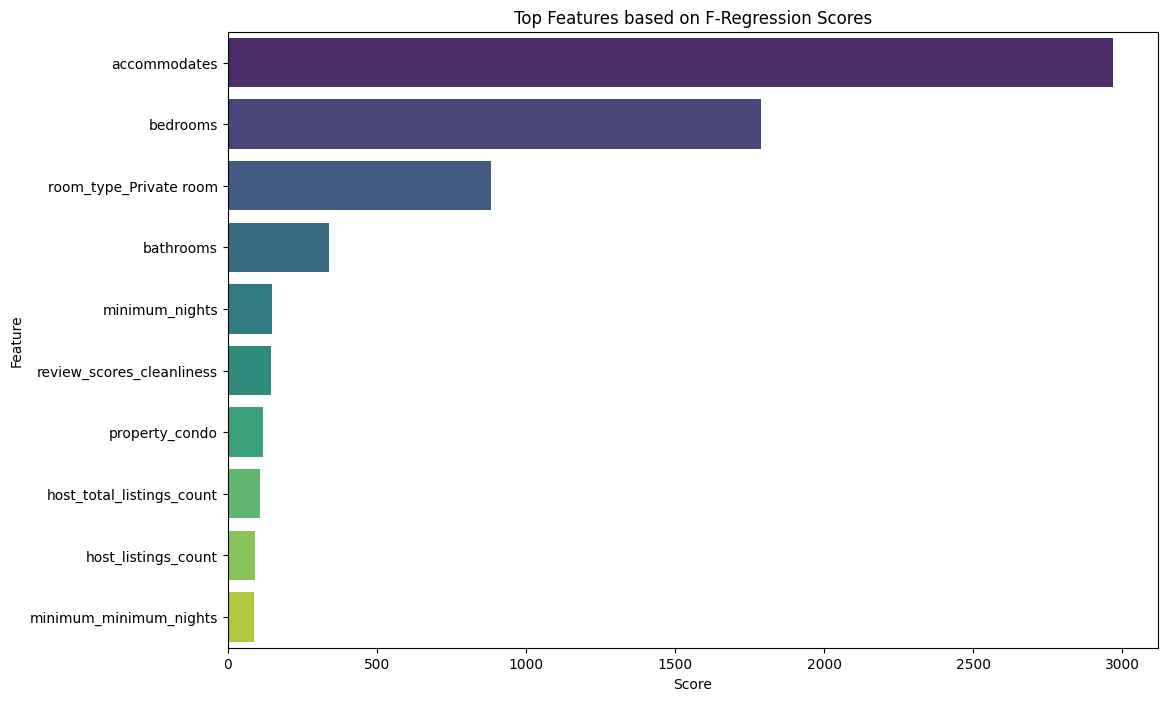

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Specs', data=top_features, palette='viridis', ci=None, dodge=False)
plt.title('Top Features based on F-Regression Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

No neighbourhood cleansed feature in top 15 features, to enhance model performance, this feature will be dropped.

## Modelling

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [62]:
df = data[['property','bathrooms','bedrooms','accommodates','instant_bookable','room_type','host_identity_verified',
           'number_of_reviews','log_price','reviews_per_month','review_scores_accuracy','review_scores_cleanliness',
           'availability_30','availability_60','availability_90','availability_365', 'minimum_nights','maximum_nights',
           'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count','host_total_listings_count',
           'host_acceptance_rate','host_response_rate']]
df = pd.get_dummies(df,columns=['room_type','instant_bookable','property','host_identity_verified'],drop_first=True, dtype=int)
df = df.dropna()
X = df.drop(['log_price'],axis=1)
y = df['log_price']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

## Multi Linear Regression

In [63]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_lr = linear.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('RMSE value for Linear Regression is:',rmse_lr)

RMSE value for Linear Regression is: 0.6453796919208387


In [64]:
r2_lr = r2_score(y_test, linear.predict(x_test))
print('R2_score for Linear Regression is :',r2_lr)

R2_score for Linear Regression is : 0.43631334011580003


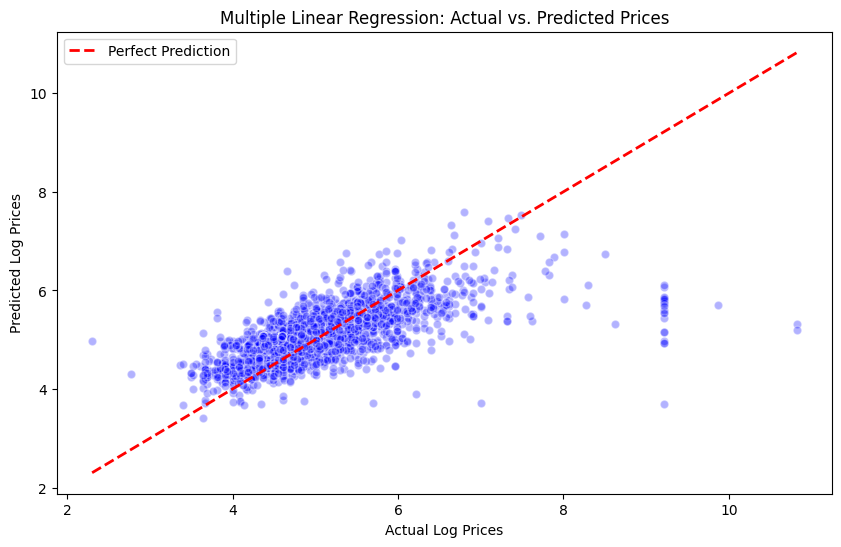

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('Multiple Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

A perfect model would result in a diagonal line.

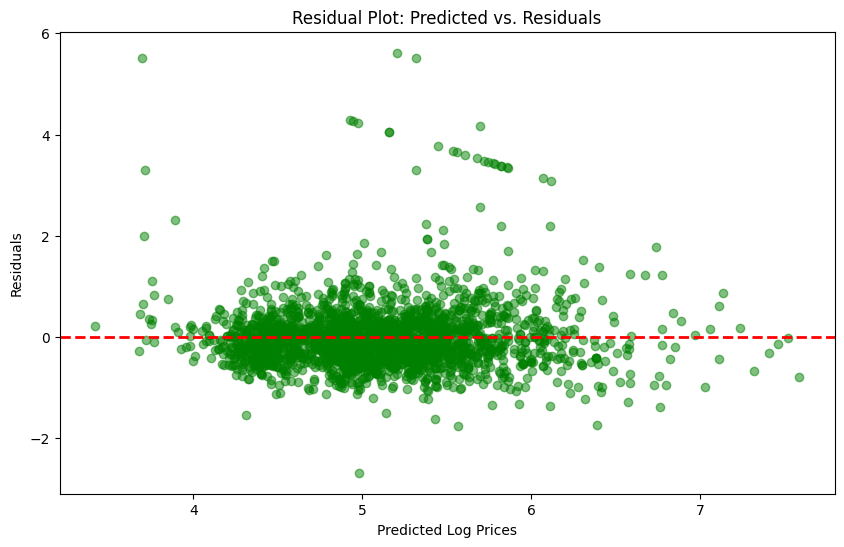

In [66]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5, c='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual Mean')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

In [67]:
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual, y=predicted, color='green', label='Actual Values')
    residuals = actual - predicted
    sns.scatterplot(x=actual, y=residuals, color='red', label='Residuals')
    plt.title(f'{model_name} - Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [68]:
lr_residuals = y_test - y_pred_lr

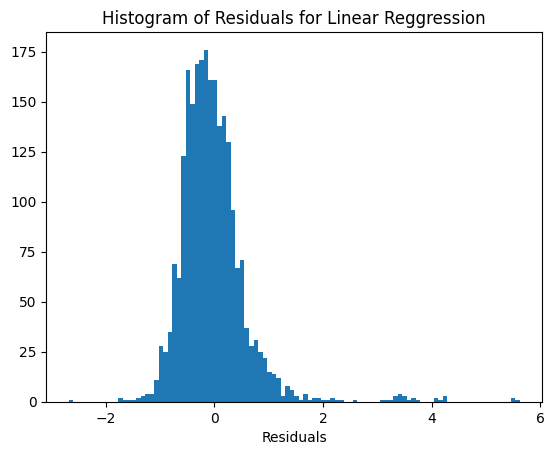

In [69]:
plt.hist(lr_residuals, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals for Linear Reggression')
plt.show()

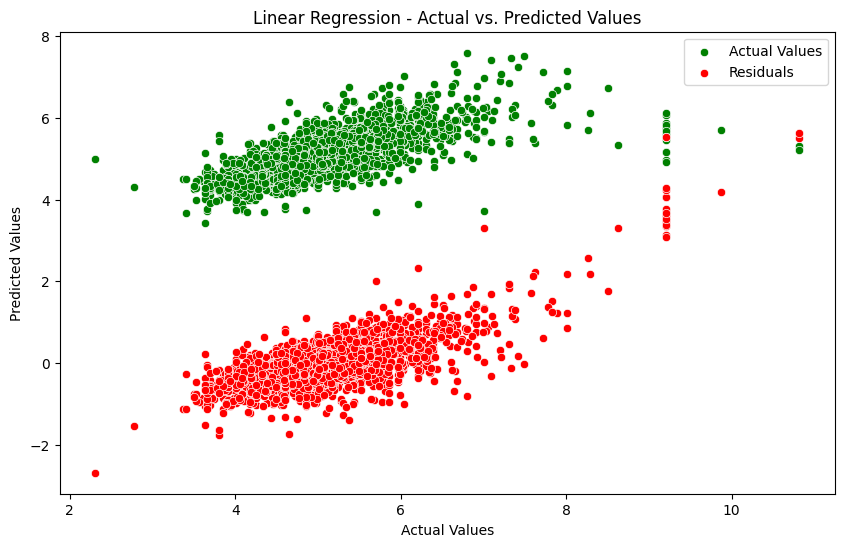

In [70]:
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression')

## Desicion Tree Regression

Perform k-fold cross validation to whole dataset to get an overview of model performance before improving the model

In [71]:
from sklearn.model_selection import cross_val_score, KFold
rmse_dt=[]
dt = DecisionTreeRegressor()
kf = KFold(5, shuffle = True, random_state=0)
mse = cross_val_score(dt ,X,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_dt.append(avg_rmse)
print("Root mean square error: " +str(round(rmse_dt[0],2)))

Root mean square error: 0.63


Prune desicion tree to find the best max_depth of the tree to prevent overfitting

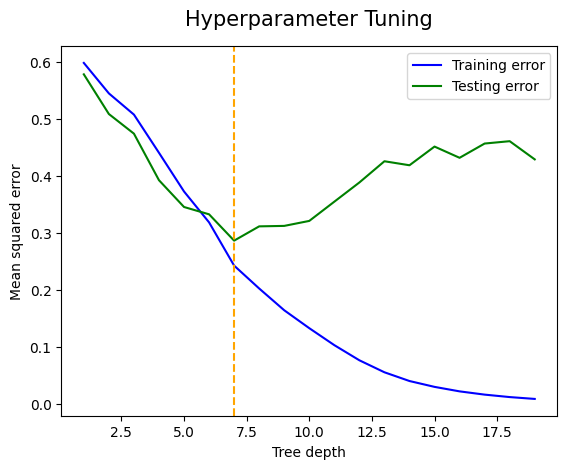

In [72]:
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_train = DecisionTreeRegressor(max_depth=max_depth)
    model_train.fit(x_train, y_train)
    training_error.append(mean_squared_error(y_train, model_train.predict(x_train)))   
testing_error = []
for max_depth in max_depths:
    model_test = DecisionTreeRegressor(max_depth=max_depth)
    model_test.fit(x_train, y_train)
    testing_error.append(mean_squared_error(y_test, model_test.predict(x_test)))
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

Get the best depth of tree when testing error is minimized. Then evaluate the improved model's performance.

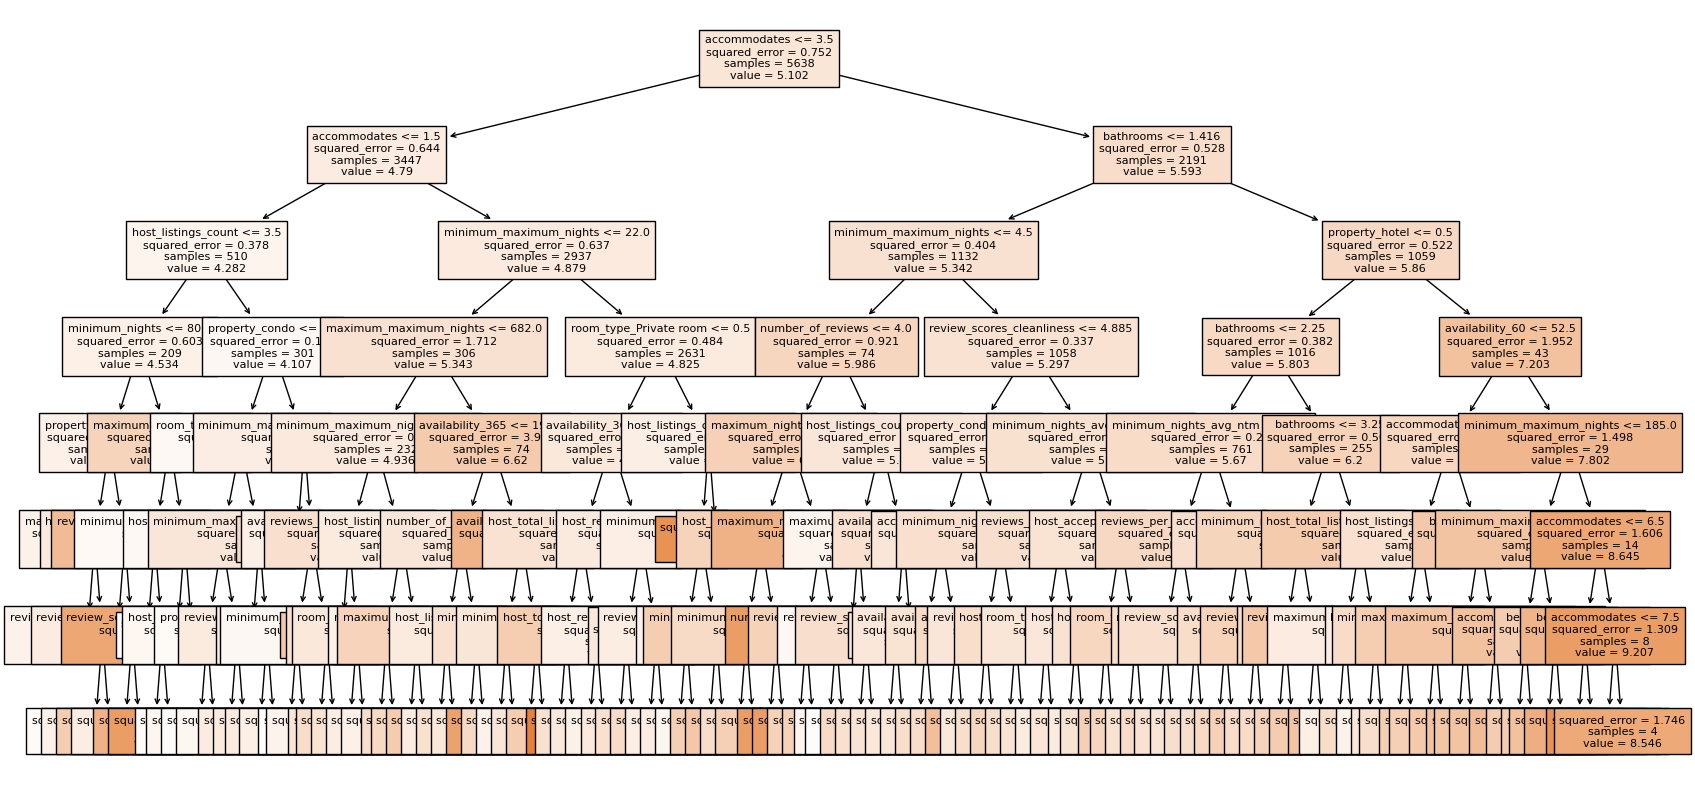

R-squared (R²) score: 0.59
Root Mean Squared Error: 0.55


In [73]:
regressor = DecisionTreeRegressor(max_depth = 7)
model = regressor.fit(x_train, y_train)
feature_names_list = list(x_train.columns)
plt.figure(figsize=(20, 10))
tree.plot_tree(regressor, feature_names = feature_names_list,fontsize = 8, filled = True)
plt.show()
y_pred_dt = model.predict(x_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'R-squared (R²) score: {r2_dt:.2f}')
print(f'Root Mean Squared Error: {rmse_dt:.2f}')

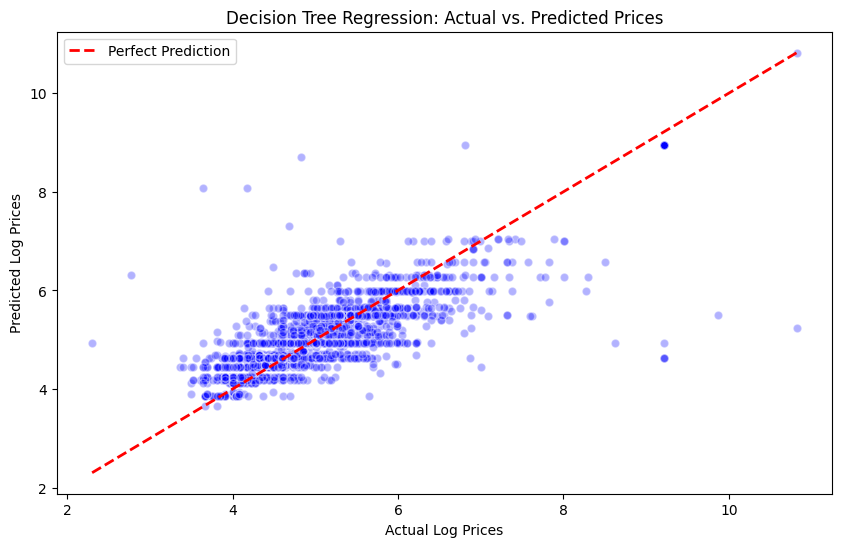

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('Decision Tree Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

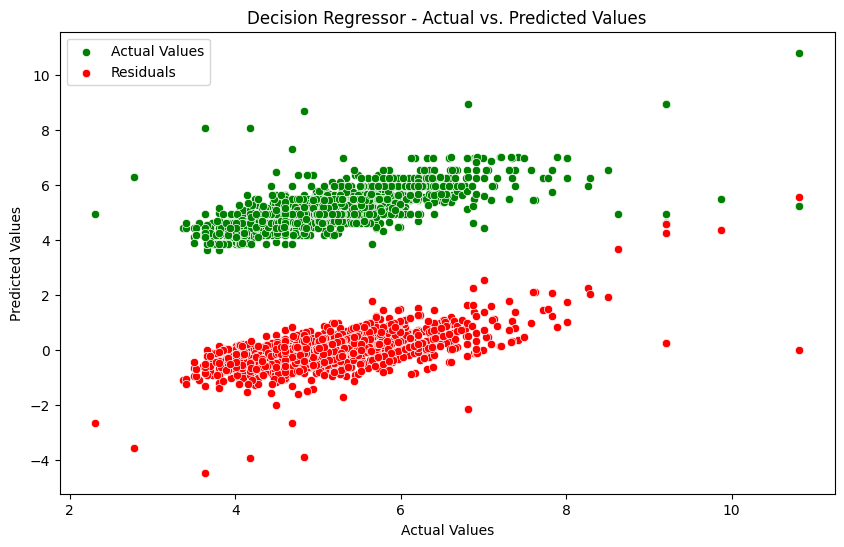

In [75]:
plot_actual_vs_predicted(y_test, y_pred_dt, 'Decision Regressor')

In [76]:
dt_residuals = y_test - y_pred_dt

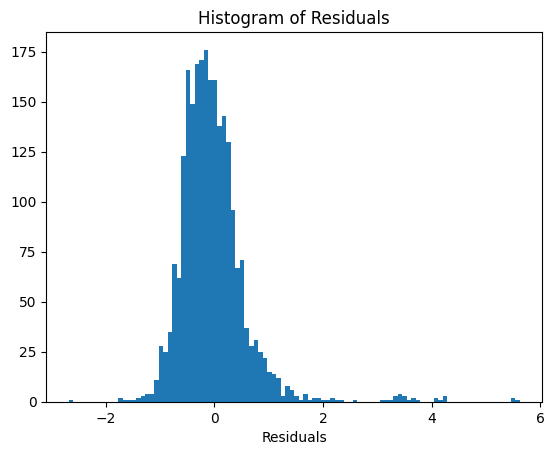

In [77]:
plt.hist(dt_residuals, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

## Random Forest Regression

In [78]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=2)
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(rf ,X,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print(rmse_rf)

[0.4608764257382103]


Hyperparameter tuning using grid search to find the best combination of hyperparameter values, and to maximize model performance.

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {                                                                                                            
    'n_estimators': [10, 50, 100, 200, 250, 300, 350, 400],                                                                                   
    'max_depth': [5,10,15, 20, 25],                                                                                      
    'min_samples_split': [2, 5, 10],                                                                                      
    'min_samples_leaf': [1, 2, 4],                                                                                        
    'max_features': ['sqrt', 'auto', 'log2']                                                                                      
}                                                                                                                         
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid,                        
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')                                  
                                                                                                                          
grid_search.fit(x_train, y_train)                                                                                         
print("Best hyperparameters:", grid_search.best_params_) 

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}


#### Apply the best parameters to the model to get the best model performance.

In [80]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(x_train, y_train)
y_pred_rf = best_rf_model.predict(x_test)

In [81]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'R-squared (R²) score: {r2_rf:.2f}')
print(f'Root Mean Squared Error: {rmse_rf:.2f}')

R-squared (R²) score: 0.76
Root Mean Squared Error: 0.42


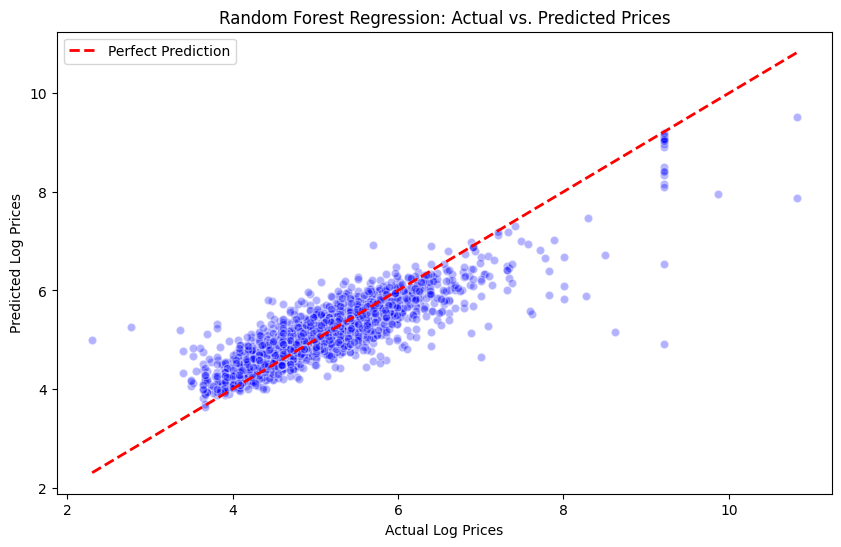

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

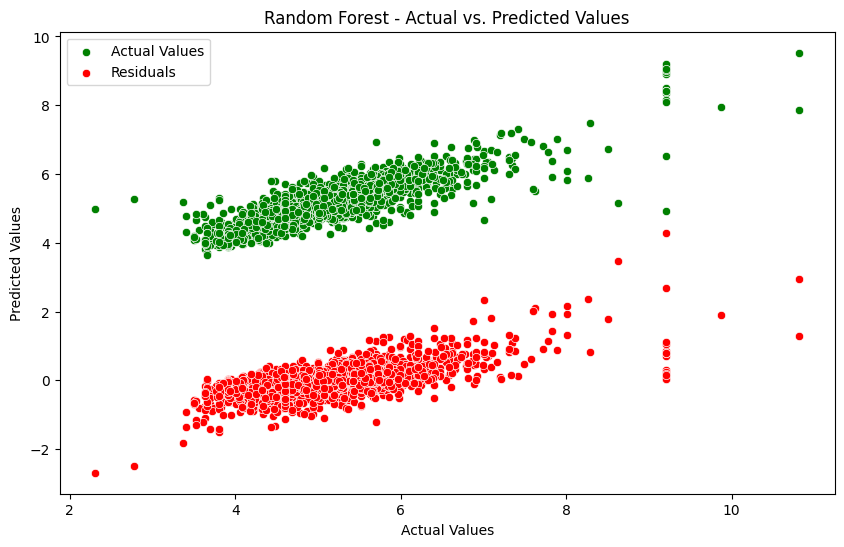

In [84]:
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest')

In [85]:
residuals_rf = y_test - y_pred_rf

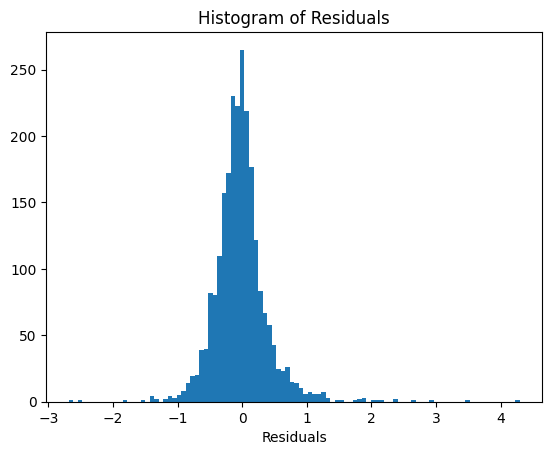

In [86]:
plt.hist(residuals_rf, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

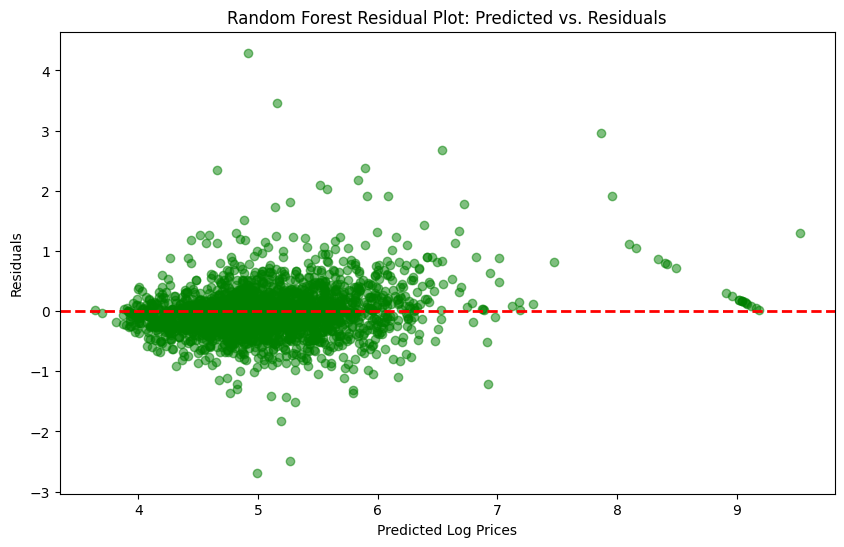

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, c='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual Mean')
plt.title('Random Forest Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

Choose this advancde random forest model to make the prediction since it has the best performance with the lowest RMSE and highest R2.

# SVR

### Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
df1 = data[['property', 'bathrooms', 'bedrooms', 'accommodates', 'instant_bookable', 'room_type',
            'host_identity_verified', 'number_of_reviews', 'log_price','reviews_per_month','review_scores_accuracy',
            'review_scores_cleanliness','availability_30','availability_60','availability_90','availability_365', 
            'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
            'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_listings_count',
            'host_total_listings_count','host_acceptance_rate','host_response_rate']].dropna()

In [90]:
X = df1.drop(['log_price'], axis=1)
y = df1['log_price']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=101)
sc_X = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [92]:
X_train[numerical_cols] = sc_X.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = sc_X.transform(X_test[numerical_cols])

In [93]:
X_train = pd.get_dummies(X_train, columns=['room_type', 'instant_bookable', 'property', 'host_identity_verified'],
                          drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['room_type', 'instant_bookable', 'property', 'host_identity_verified'],
                         drop_first=True, dtype=int)

In [94]:
sc_y = StandardScaler()
Y_train = sc_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = sc_y.transform(Y_test.values.reshape(-1, 1)).ravel()

In [95]:
param_grid = {
    'C': [1, 10, 50],
    'epsilon': [0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 50, 100], 'epsilon': [0.1, 0.5, 1, 1.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [96]:
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Y_pred_svr = best_svr_model.predict(X_test)

r2_svr = r2_score(Y_test, Y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))

Best Hyperparameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


In [97]:
print(f'R-Squared (R²) score: {r2_svr:.2f}')
print(f'Root Mean Squared Error: {rmse_svr:.2f}')

R-Squared (R²) score: 0.55
Root Mean Squared Error: 0.67


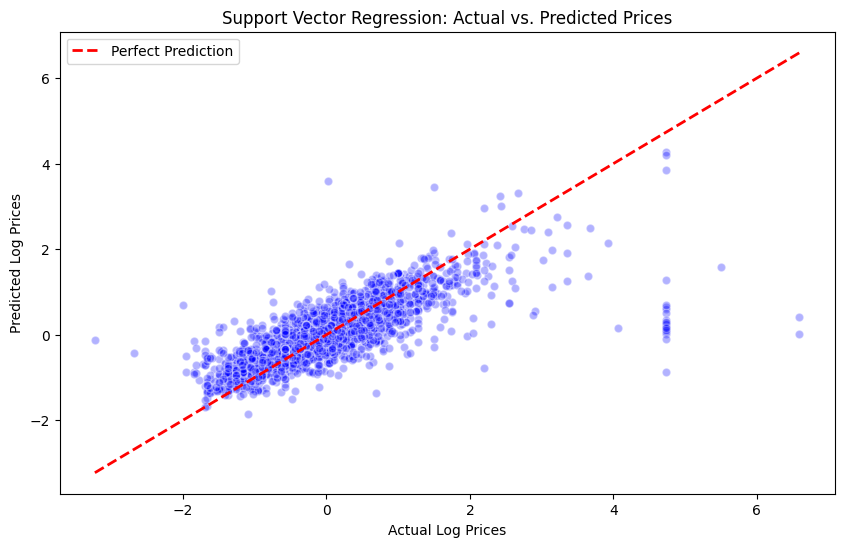

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_svr, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('Support Vector Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

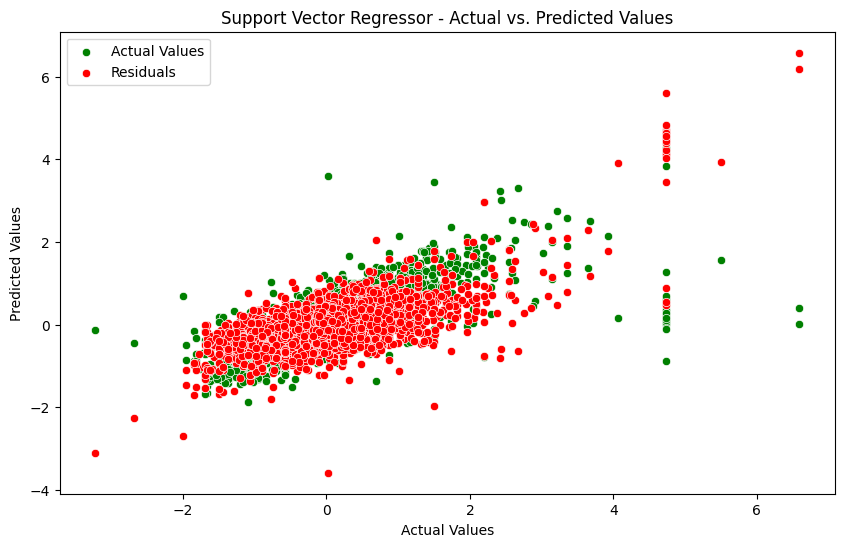

In [131]:
plot_actual_vs_predicted(Y_test, Y_pred_svr, 'Support Vector Regressor')

In [100]:
residuals_svr = Y_test - Y_pred_svr

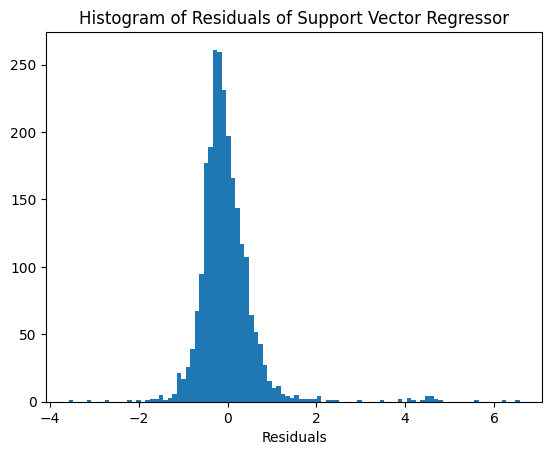

In [132]:
plt.hist(residuals_svr, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals of Support Vector Regressor')
plt.show()

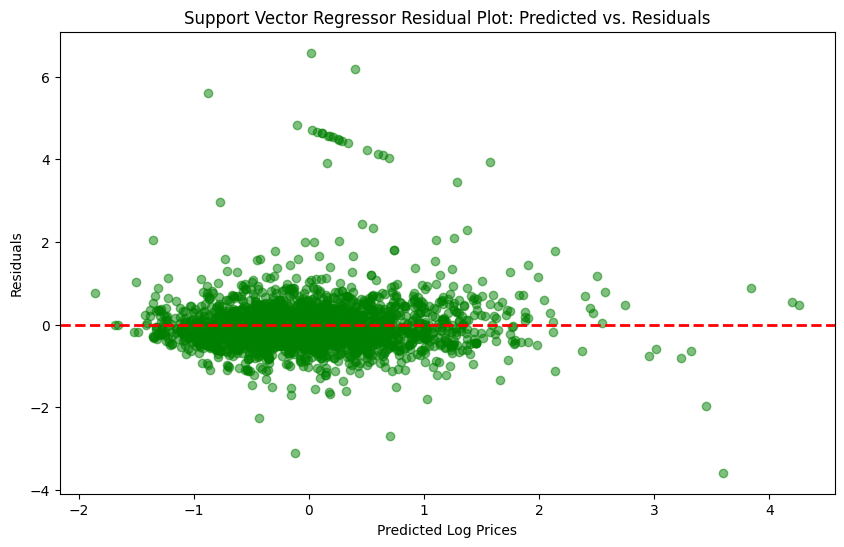

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_svr, residuals_svr, alpha=0.5, c='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual Mean')
plt.title('Support Vector Regressor Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

### The performance is not as good as the advanced Random Forest Model

## Gradient Boosting Regression

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gb_regressor = GradientBoostingRegressor()

In [105]:
param_grid = {
    'n_estimators': [50,100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2,],
    'max_depth': [3,4, 5, 7, 10],
    'min_samples_split': [2,5, 10, 15]
}

In [106]:
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv = 3)
grid_search_gb.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 7, 10, 12],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200]})

In [107]:
best_params_gb = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_
print("Best Paramters for Gradient Boosintg:", best_params_gb)
print("Best model for Gradient Boosting:", best_gb_model)

Best Paramters for Gradient Boosintg: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 150}
Best model for Gradient Boosting: GradientBoostingRegressor(max_depth=7, min_samples_split=10, n_estimators=150)


In [108]:
Y_pred_gb = best_gb_model.predict(X_test)
r2_gb = r2_score(Y_test, Y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(Y_test, Y_pred_gb))
print(f'Gradient Boosting - R-Squared (R²) score: {r2_gb:.2f}')
print(f'Gradient Boosting - Root Mean Squared Error: {rmse_gb}')

Gradient Boosting - R-Squared (R²) score: 0.74
Gradient Boosting - Root Mean Squared Error: 0.5046604114225187


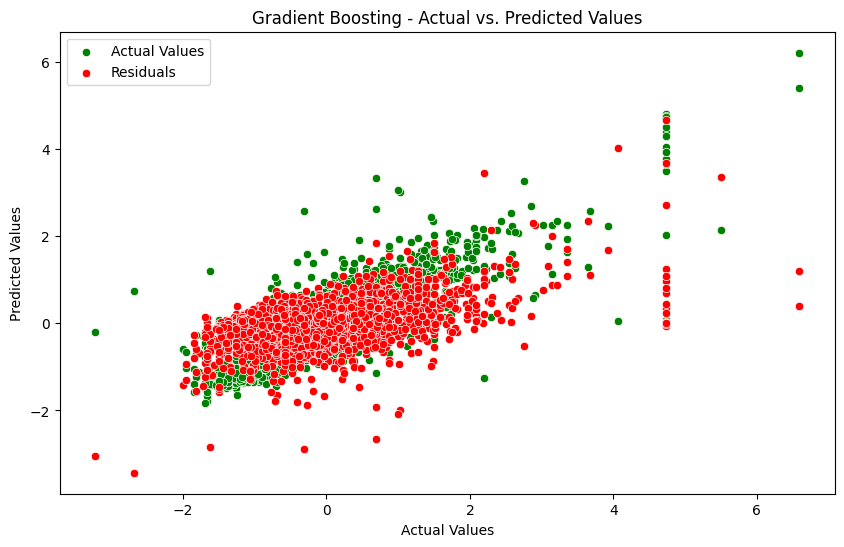

In [134]:
plot_actual_vs_predicted(Y_test, Y_pred_gb, 'Gradient Boosting')

In [110]:
residuals_gb = Y_test - Y_pred_gb

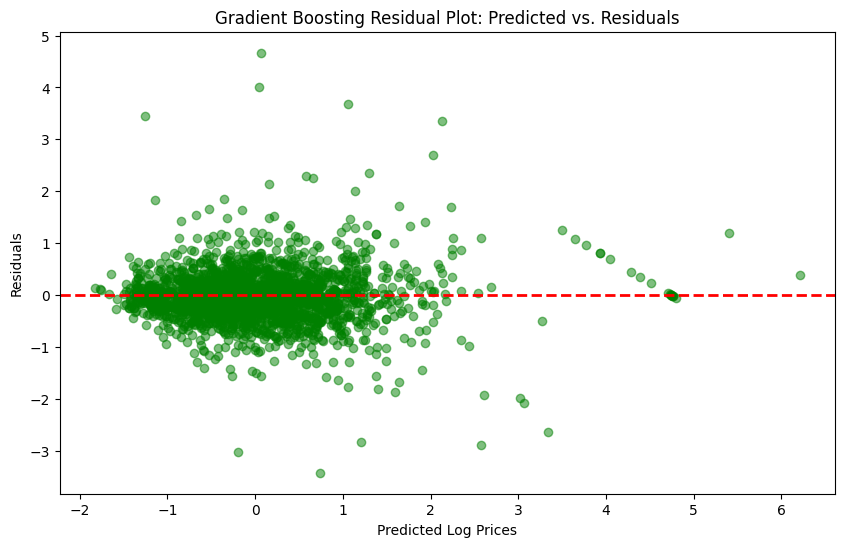

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_gb, residuals_gb, alpha=0.5, c='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual Mean')
plt.title('Gradient Boosting Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

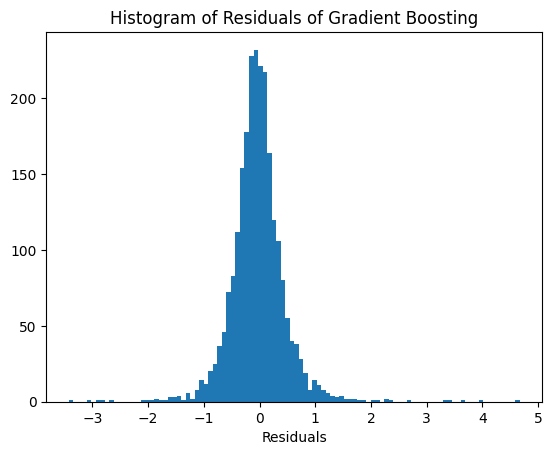

In [136]:
plt.hist(residuals_gb, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals of Gradient Boosting')
plt.show()

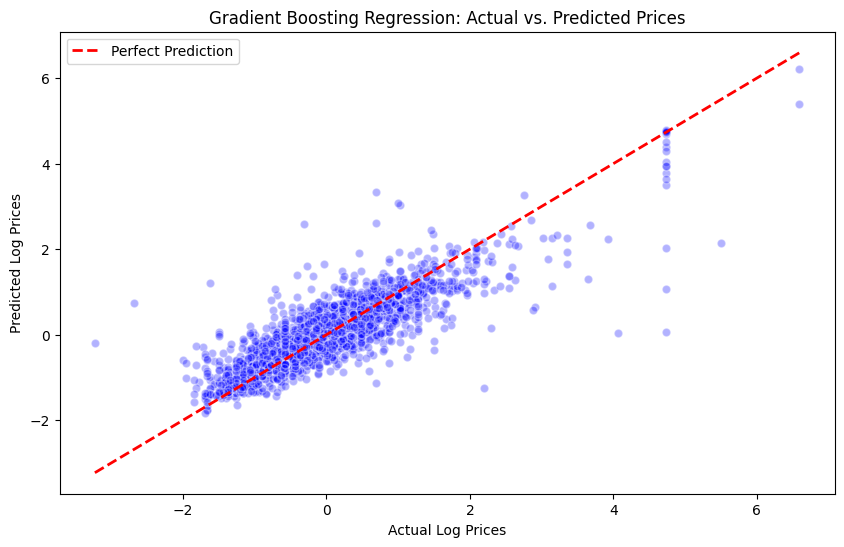

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_gb, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('Gradient Boosting Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

## XG Boost

In [115]:
from xgboost import XGBRegressor

In [116]:
xgb_regressor = XGBRegressor()

In [117]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5,6, 7, 8, 9],
    'min_child_weight': [1,3, 5, 7, 9]
}
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [1, 3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]})

In [118]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_
print('Best parameters for XGBoost: ', best_params_xgb)

Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 150}


In [119]:
Y_pred_xgb = best_xgb_model.predict(X_test)
r2_xgb = r2_score(Y_test, Y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
print(f'XGBoost - R-Squared(R²) score: {r2_xgb:.2f}')
print(f'XGBoost - Root Mean Squared Error: {rmse_xgb}')

XGBoost - R-Squared(R²) score: 0.76
XGBoost - Root Mean Squared Error: 0.4811090673558284


In [122]:
residuals_xgb = Y_test - Y_pred_xgb

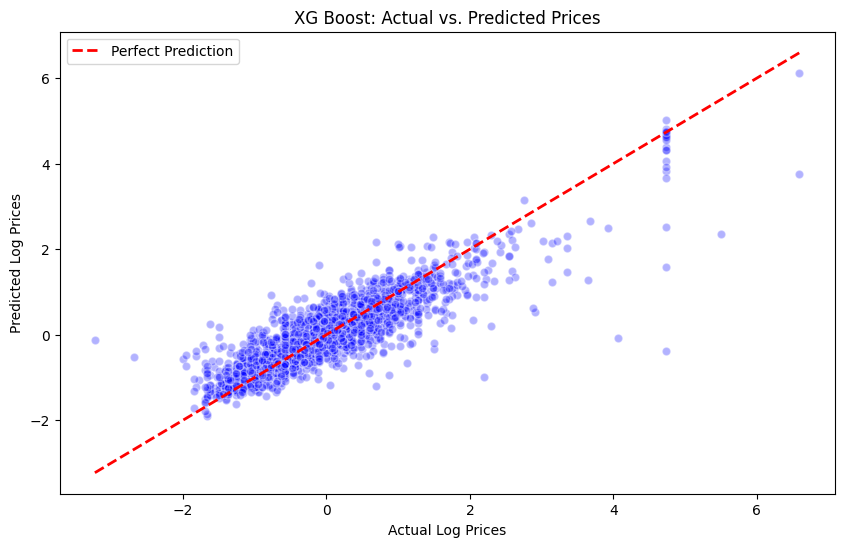

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_xgb, alpha=0.3, color='b', edgecolors='w')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
plt.title('XG Boost: Actual vs. Predicted Prices')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.legend()
plt.show()

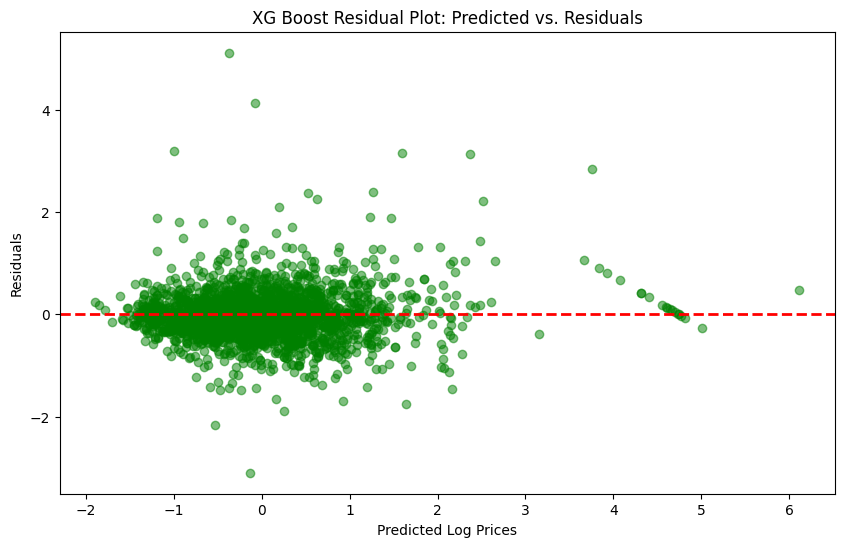

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_xgb, residuals_xgb, alpha=0.5, c='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual Mean')
plt.title('XG Boost Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Log Prices')
plt.ylabel('Residuals')
plt.show()

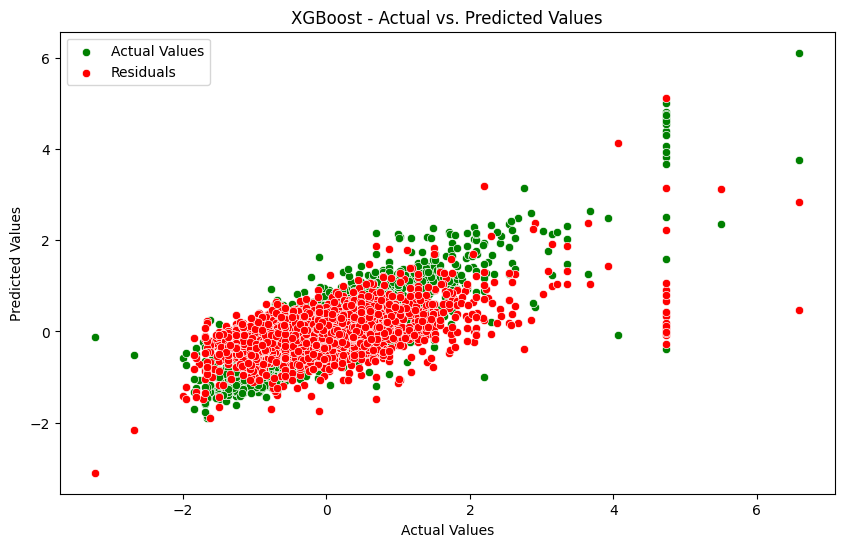

In [126]:
plot_actual_vs_predicted(Y_test, Y_pred_xgb, 'XGBoost')

In [147]:
residuals_xgb = Y_test - Y_pred_xgb

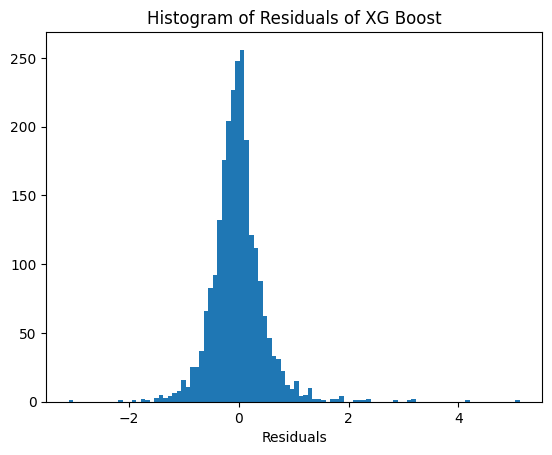

In [149]:
plt.hist(residuals_xgb, bins=100)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals of XG Boost')
plt.show()

## Overall Model's performance

In [127]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting', 'XGBoost']

rmse_scores = [rmse_lr, rmse_dt, rmse_rf, rmse_svr, rmse_gb, rmse_xgb]
r2_scores = [r2_lr, r2_dt, r2_rf, r2_svr, r2_gb, r2_xgb]

results_df = pd.DataFrame({'Model': model_names, 'RMSE': rmse_scores, 'R2 Score': r2_scores})

In [128]:
results_df

,Model,RMSE,R2 Score
0,Linear Regression,0.645380,0.436313
1,Decision Tree,0.548136,0.593385
2,Random Forest,0.419044,0.762356
3,Support Vector Regression,0.665514,0.549492
4,Gradient Boosting,0.504660,0.740948
5,XGBoost,0.481109,0.764563


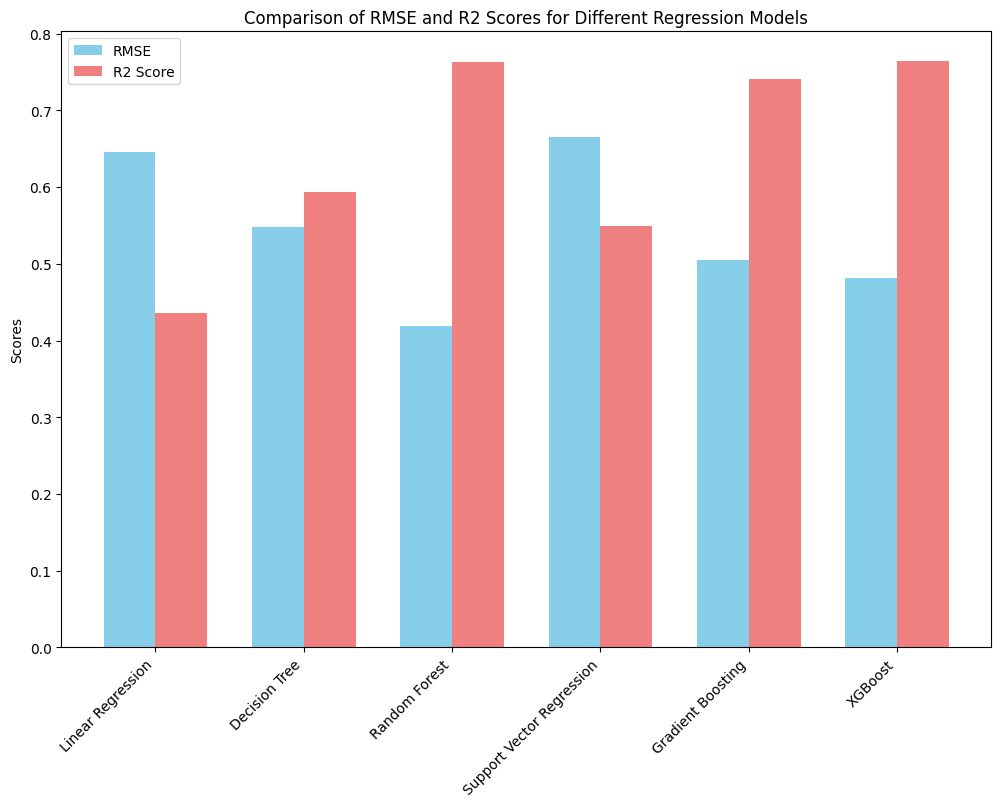

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
bar1 = ax.bar(np.arange(len(model_names)), rmse_scores, bar_width, label='RMSE', color='skyblue')

bar2 = ax.bar(np.arange(len(model_names)) + bar_width, r2_scores, bar_width, label='R2 Score', color='lightcoral')

ax.set_xticks(np.arange(len(model_names)) + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Comparison of RMSE and R2 Scores for Different Regression Models')
ax.legend()
plt.show()